# "Climate Data Analysis and Forecasting using Python: A Case Study on Temperature Trends and Predictions in Various Locations of Bangladesh"

## 1. Data Download:

In [1]:
# Import required libraries
import requests
import pandas as pd
from datetime import datetime, timedelta

In [2]:
# NASA API base URL
base_url = "https://power.larc.nasa.gov/api/temporal/daily/point"

In [3]:
# Parameters for the API request
parameters = "TS,T2M,QV2M,RH2M"
community = "RE"

In [4]:
# Define the regions (longitude, latitude) of six different locations in Bangladesh
regions = [
    (90.4150, 23.7160),   # Dhaka
    (91.8367, 22.3360),   # Chittagong
    (89.3554, 24.3636),   # Rajshahi
    (88.6178, 24.9036),   # Khulna
    (92.2905, 24.3745),   # Sylhet
    (88.1462, 22.6939),   # Barisal
]

# Define the mapping of coordinates to location names
location_names = {
    (90.4150, 23.7160): "Dhaka",
    (91.8367, 22.3360): "Chittagong",
    (89.3554, 24.3636): "Rajshahi",
    (88.6178, 24.9036): "Khulna",
    (92.2905, 24.3745): "Sylhet",
    (88.1462, 22.6939): "Barisal",
}

In [5]:
# Date range for which data needs to be downloaded
start_date_str = "20170101"
end_date_str = "20221231"
start_date = datetime.strptime(start_date_str, "%Y%m%d")
end_date = datetime.strptime(end_date_str, "%Y%m%d")

In [6]:
# Construct the list of coordinates for the API request
coordinates_list = [{"longitude": lon, "latitude": lat} for lon, lat in regions]

In [7]:
# Create an empty list to store the data
rows = []

# Loop through coordinates and fetch data
for coordinate in coordinates_list:
    url = f"{base_url}?parameters={parameters}&community={community}&longitude={coordinate['longitude']}&latitude={coordinate['latitude']}&format=JSON&start={start_date_str}&end={end_date_str}"

    response = requests.get(url)
    data = response.json()

    for parameter, parameter_data in data["properties"]["parameter"].items():
        parameter_units = data["parameters"][parameter]["units"]
        parameter_longname = data["parameters"][parameter]["longname"]

        for date_str, value in parameter_data.items():
            date = datetime.strptime(date_str, "%Y%m%d")
            location_name = location_names[coordinate['longitude'], coordinate['latitude']]
            rows.append([date, (coordinate['longitude'], coordinate['latitude']), location_name, parameter, value, parameter_units, parameter_longname])

# Create a DataFrame from the collected data
df = pd.DataFrame(rows, columns=["Date", "Coordinates", "Location", "Parameter", "Value", "Unit", "LongName"])

In [8]:
# Show the dataframe
df.head()

,Date,Coordinates,Location,Parameter,Value,Unit,LongName
0,2017-01-01,"(90.415, 23.716)",Dhaka,TS,18.77,C,Earth Skin Temperature
1,2017-01-02,"(90.415, 23.716)",Dhaka,TS,18.55,C,Earth Skin Temperature
2,2017-01-03,"(90.415, 23.716)",Dhaka,TS,18.71,C,Earth Skin Temperature
3,2017-01-04,"(90.415, 23.716)",Dhaka,TS,18.85,C,Earth Skin Temperature
4,2017-01-05,"(90.415, 23.716)",Dhaka,TS,17.86,C,Earth Skin Temperature


In [9]:
#save the dataframe as CSV
df.to_csv('downloaded_data', index=False)

## 2. Data Preprocessing:

In [10]:
# Read csv file 
raw_data = pd.read_csv("downloaded_data")

In [11]:
# Show the dataframe
raw_data.head()

,Date,Coordinates,Location,Parameter,Value,Unit,LongName
0,2017-01-01,"(90.415, 23.716)",Dhaka,TS,18.77,C,Earth Skin Temperature
1,2017-01-02,"(90.415, 23.716)",Dhaka,TS,18.55,C,Earth Skin Temperature
2,2017-01-03,"(90.415, 23.716)",Dhaka,TS,18.71,C,Earth Skin Temperature
3,2017-01-04,"(90.415, 23.716)",Dhaka,TS,18.85,C,Earth Skin Temperature
4,2017-01-05,"(90.415, 23.716)",Dhaka,TS,17.86,C,Earth Skin Temperature


In [12]:
# Get the shape of the DataFrame (rows, columns)
raw_data.shape

(52584, 7)

In [13]:
# Display the data types of columns
raw_data.dtypes

Date            object
Coordinates     object
Location        object
Parameter       object
Value          float64
Unit            object
LongName        object
dtype: object

In [14]:
# Check for null values in the DataFrame
null_values = raw_data.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()

# Print the count of null values in each column
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
Date           0
Coordinates    0
Location       0
Parameter      0
Value          0
Unit           0
LongName       0
dtype: int64


In [15]:
# Get unique values in the 'Parameter' column
unique_values = raw_data['Parameter'].unique()
unique_values

array(['TS', 'T2M', 'QV2M', 'RH2M'], dtype=object)

In [16]:
# Pivot the DataFrame to get the desired structure
pivoted_df = raw_data.pivot_table(index=["Date", "Coordinates", "Location"], columns="LongName", values="Value")

# Reset the index to move Date, Coordinates, and Location from index to columns
pivoted_df = pivoted_df.reset_index()

# Create new column names with units
new_columns = ["Date", "Coordinates", "Location"]
for col in pivoted_df.columns[3:]:
    unit = raw_data[raw_data["LongName"] == col]["Unit"].values[0]
    new_columns.append(f"{col} ({unit})")

pivoted_df.columns = new_columns

final_df = pivoted_df

In [17]:
#Show the Final data frame
final_df.head(10)

,Date,Coordinates,Location,Earth Skin Temperature (C),Relative Humidity at 2 Meters (%),Specific Humidity at 2 Meters (g/kg),Temperature at 2 Meters (C)
0,2017-01-01,"(88.1462, 22.6939)",Barisal,18.34,70.94,10.01,19.86
1,2017-01-01,"(88.6178, 24.9036)",Khulna,18.80,76.50,10.62,19.65
2,2017-01-01,"(89.3554, 24.3636)",Rajshahi,19.22,75.56,10.68,19.98
3,2017-01-01,"(90.415, 23.716)",Dhaka,18.77,74.50,10.50,19.89
4,2017-01-01,"(91.8367, 22.336)",Chittagong,19.89,77.75,11.41,20.42
5,2017-01-01,"(92.2905, 24.3745)",Sylhet,19.01,85.38,12.27,19.83
6,2017-01-02,"(88.1462, 22.6939)",Barisal,18.30,75.75,10.38,19.46
7,2017-01-02,"(88.6178, 24.9036)",Khulna,18.47,77.88,10.44,19.14
8,2017-01-02,"(89.3554, 24.3636)",Rajshahi,18.97,76.19,10.44,19.51
9,2017-01-02,"(90.415, 23.716)",Dhaka,18.55,73.00,10.19,19.68


## 3. Dataframe Queries:

In [18]:
# Get the shape of the DataFrame (rows, columns)
final_df.shape

(13146, 7)

In [19]:
# Display basic statistics of the DataFrame
final_df.describe()

,Earth Skin Temperature (C),Relative Humidity at 2 Meters (%),Specific Humidity at 2 Meters (g/kg),Temperature at 2 Meters (C)
count,13146.000000,13146.000000,13146.000000,13146.000000
mean,25.276441,77.062570,15.908385,25.320772
std,5.094004,13.150003,5.292280,4.623693
min,10.000000,17.000000,3.420000,11.380000
25%,21.290000,70.060000,10.860000,21.790000
50%,27.420000,80.880000,16.910000,27.370000
75%,28.890000,87.060000,20.940000,28.690000
max,36.210000,97.380000,24.110000,34.400000


In [20]:
# Group by 'Date' and find the location with maximum temperature
max_temp_by_date = final_df.groupby('Date').apply(lambda x: x.loc[x['Temperature at 2 Meters (C)'].idxmax()])

max_temp_by_date = max_temp_by_date[['Location', 'Temperature at 2 Meters (C)']]

max_temp_by_date

,Location,Temperature at 2 Meters (C)
Date,,
2017-01-01,Chittagong,20.42
2017-01-02,Chittagong,20.51
2017-01-03,Chittagong,20.43
2017-01-04,Chittagong,19.73
2017-01-05,Chittagong,19.48
...,...,...
2022-12-27,Barisal,21.62
2022-12-28,Chittagong,21.20
2022-12-29,Chittagong,19.37


In [21]:
# Group by 'Date' and find the row with maximum Relative Humidity
max_relative_humidity_by_date = final_df.groupby('Date').apply(lambda x: x.loc[x['Relative Humidity at 2 Meters (%)'].idxmax()])

max_relative_humidity_by_date = max_relative_humidity_by_date[['Location', 'Relative Humidity at 2 Meters (%)']]

max_relative_humidity_by_date

,Location,Relative Humidity at 2 Meters (%)
Date,,
2017-01-01,Sylhet,85.38
2017-01-02,Sylhet,82.94
2017-01-03,Sylhet,83.81
2017-01-04,Dhaka,81.75
2017-01-05,Sylhet,81.75
...,...,...
2022-12-27,Sylhet,92.19
2022-12-28,Chittagong,84.06
2022-12-29,Chittagong,76.12


## 4. Interactive Max Temperature Calculator

In [26]:
# import library for GUI
import tkinter as tk

In [29]:

# Function to calculate and display maximum temperature for the input date
def calculate_max_temp():
    selected_date_str = date_entry.get()

    try:
        # Convert the entered date to datetime format matching the DataFrame
        selected_date = datetime.strptime(selected_date_str, '%Y-%m-%d').date()

        # Filter the DataFrame based on the selected date and calculate max temperature
        max_temp = final_df[final_df['Date'] == selected_date.strftime('%Y-%m-%d')]['Temperature at 2 Meters (C)'].max()
        result_label.config(text=f"Maximum temperature for {selected_date} is: {max_temp:.2f} °C", fg="#2E8B57")
    except:
        result_label.config(text="Invalid date or data not available", fg="red")

# Create the main window
root = tk.Tk()
root.title("Max Temperature by Date")
root.geometry("400x200")
root.configure(bg="#f0f0f0")

# Title label
title_label = tk.Label(root, text="Maximum Temperature Calculator", font=("Helvetica", 16), bg="#f0f0f0")
title_label.pack(pady=10)

# Date input label and entry
date_label = tk.Label(root, text="Enter Date (YYYY-MM-DD):", font=("Helvetica", 12), bg="#f0f0f0")
date_label.pack()

date_entry = tk.Entry(root, font=("Helvetica", 12))
date_entry.pack(pady=5)

# Calculate button
calculate_button = tk.Button(root, text="Calculate", font=("Helvetica", 12), bg="#2E8B57", fg="white", command=calculate_max_temp)
calculate_button.pack(pady=10)

# Result label
result_label = tk.Label(root, text="", font=("Helvetica", 12), bg="#f0f0f0")
result_label.pack()

# Start the main event loop
root.mainloop()

## 5. Data Visualization: 

In [30]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

### 5.1. Line plot

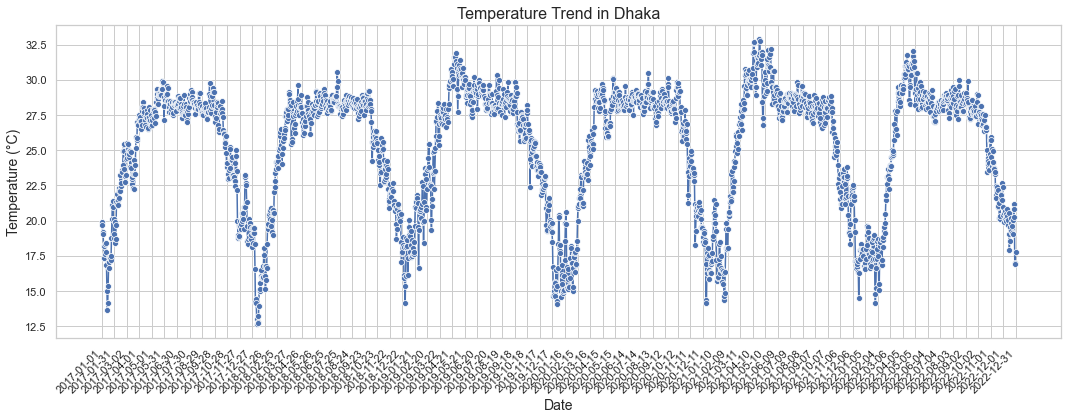

In [32]:
# Line plot of temperature over time for a specific location (e.g., Dhaka)
plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Temperature at 2 Meters (C)", data=final_df[final_df["Location"] == "Dhaka"], marker='o', markersize=6, color='b')

# Specify tick positions and labels for the x-axis
x_ticks = final_df[final_df["Location"] == "Dhaka"]["Date"].iloc[::30]  # Show every 30th date
plt.xticks(x_ticks, rotation=45, ha="right")  # Rotate the labels for better readability

plt.title("Temperature Trend in Dhaka", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.tight_layout()
plt.show()

### 5.2. Bar plot

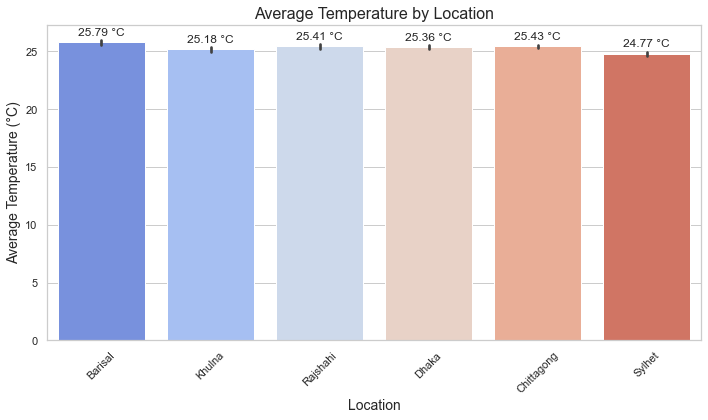

In [33]:
# Bar plot of average temperature for each location

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Location", y="Temperature at 2 Meters (C)", data=final_df, palette="coolwarm")

# Add temperature values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f} °C', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set title, labels, and layout
plt.title("Average Temperature by Location", fontsize=16)
plt.xlabel("Location", fontsize=14)
plt.ylabel("Average Temperature (°C)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 5.3. Line plot for all location

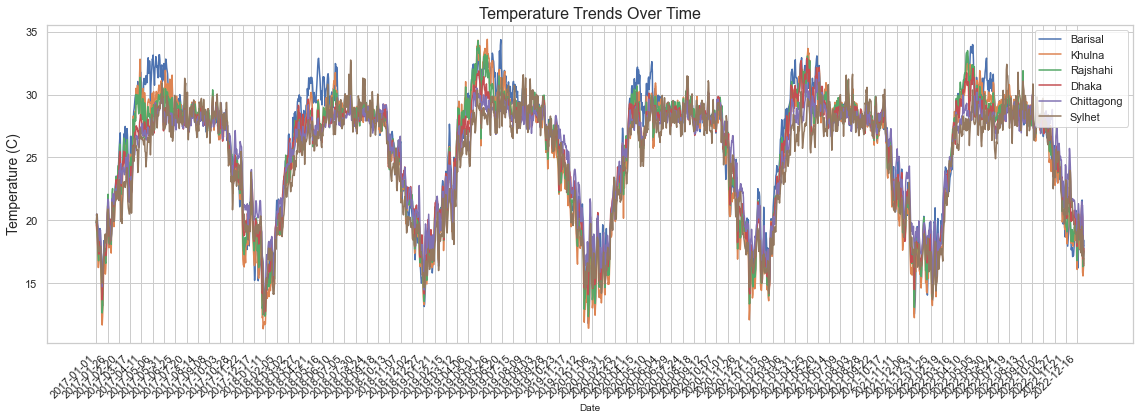

In [35]:
# Line plot for temperature trends over time for different locations
plt.figure(figsize=(16, 6))
sns.lineplot(x='Date', y='Temperature at 2 Meters (C)', hue='Location', data=final_df)

plt.xticks(final_df['Date'][::150], rotation=45, ha="right")

plt.title('Temperature Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Temperature (C)', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 5.4. Pair plot for exploring relationships between variables

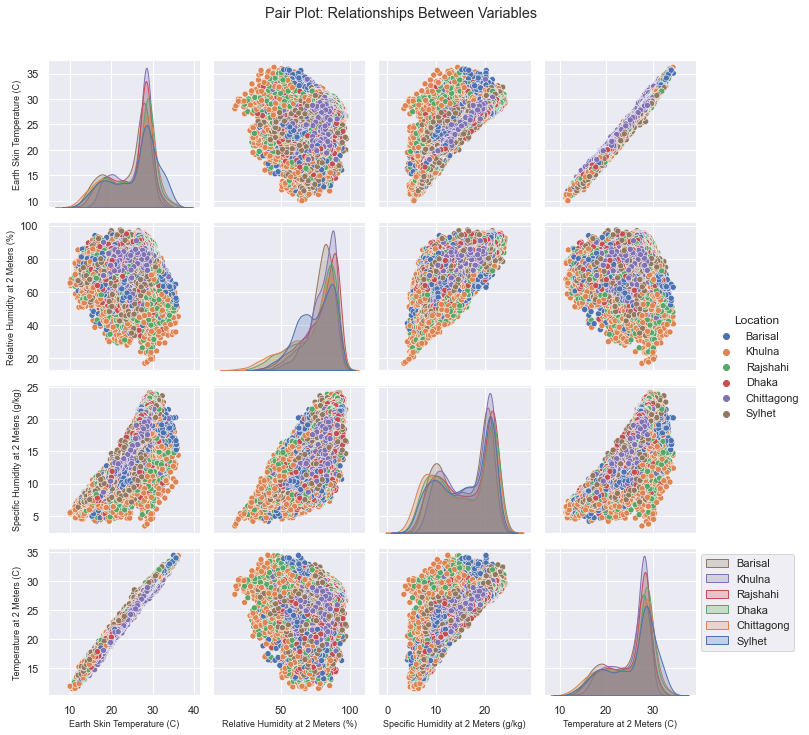

In [36]:

# Set Seaborn style with increased space between subplot rows
sns.set(rc={'figure.figsize':(16, 16)})
sns.set_context("notebook", rc={"axes.labelsize": 9})

# Pair plot for exploring relationships between variables
g = sns.pairplot(final_df, hue='Location')
g.map_upper(sns.scatterplot, markers=["o", "s", "D", "P", "X"])  # Custom markers for upper triangle

# Move the legend outside the plot
plt.legend(final_df["Location"].unique(), loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('Pair Plot: Relationships Between Variables', y=1.02)
plt.tight_layout()
plt.show()

### 5.5. Histrogram

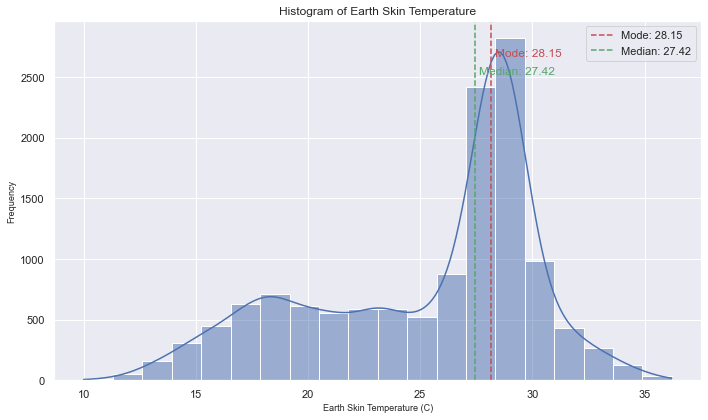

In [37]:
# Plot histogram for Earth Skin Temperature
plt.figure(figsize=(10, 6))  # Set plot size here
sns.histplot(data=final_df, x='Earth Skin Temperature (C)', bins=20, kde=True)

# Calculate mode and median
mode = final_df['Earth Skin Temperature (C)'].mode()[0]
median = final_df['Earth Skin Temperature (C)'].median()

# Add vertical lines for mode and median
plt.axvline(x=mode, color='r', linestyle='--', label=f'Mode: {mode:.2f}')
plt.axvline(x=median, color='g', linestyle='--', label=f'Median: {median:.2f}')

# Annotate mode and median values
plt.text(mode + 0.2, plt.ylim()[1]*0.9, f'Mode: {mode:.2f}', color='r')
plt.text(median + 0.2, plt.ylim()[1]*0.85, f'Median: {median:.2f}', color='g')

plt.xlabel('Earth Skin Temperature (C)')
plt.ylabel('Frequency')
plt.title('Histogram of Earth Skin Temperature')
plt.legend()
plt.tight_layout()
plt.show()

### 5.6. Time Series Analysis

In [38]:
# Import required libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

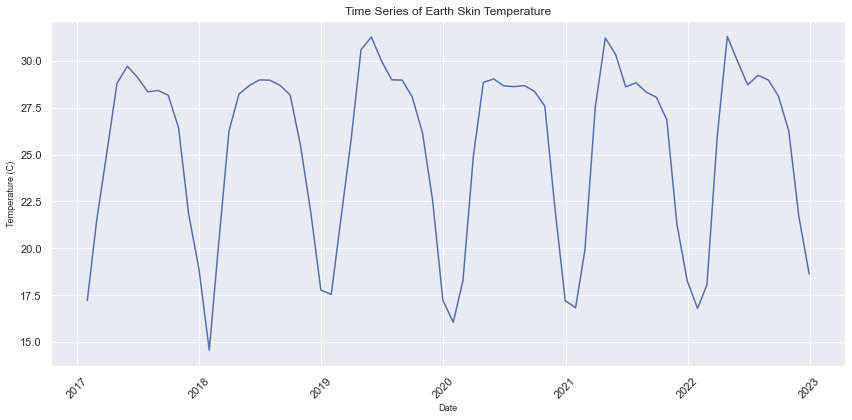

In [39]:
# Convert 'Date' column to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Create a new DataFrame with the 'Date' column as index and resample to monthly frequency
time_series_df = final_df.set_index('Date').resample('M').mean()

# Plotting a time series of Earth Skin Temperature
plt.figure(figsize=(12, 6))
plt.plot(time_series_df.index, time_series_df['Earth Skin Temperature (C)'])
plt.title('Time Series of Earth Skin Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

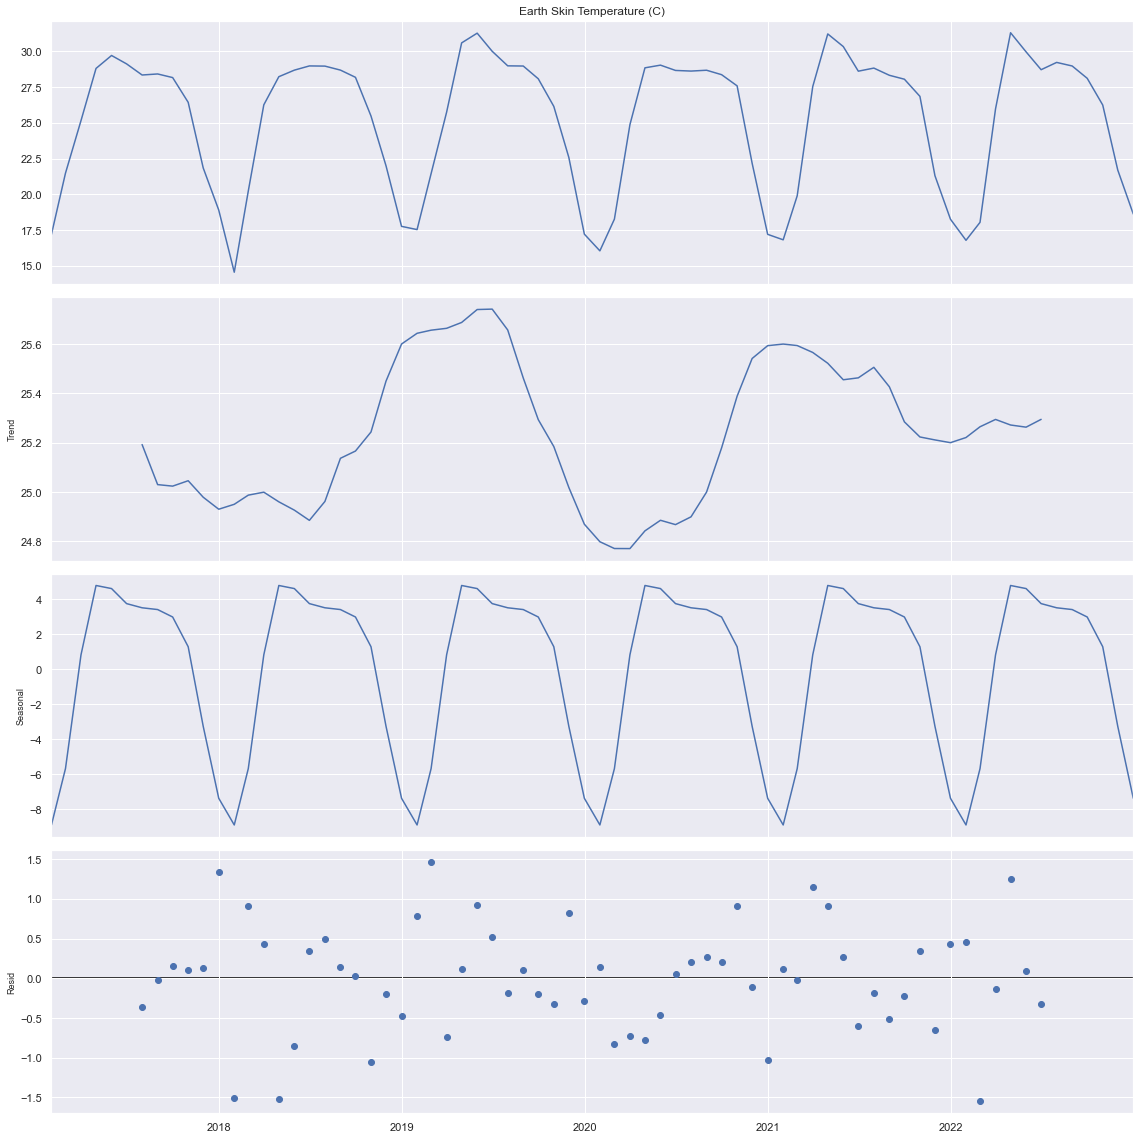

In [40]:
# Perform seasonal decomposition
result = seasonal_decompose(time_series_df['Earth Skin Temperature (C)'], model='additive')

# Plot the decomposition
plt.figure(figsize=(10, 6))
result.plot()
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

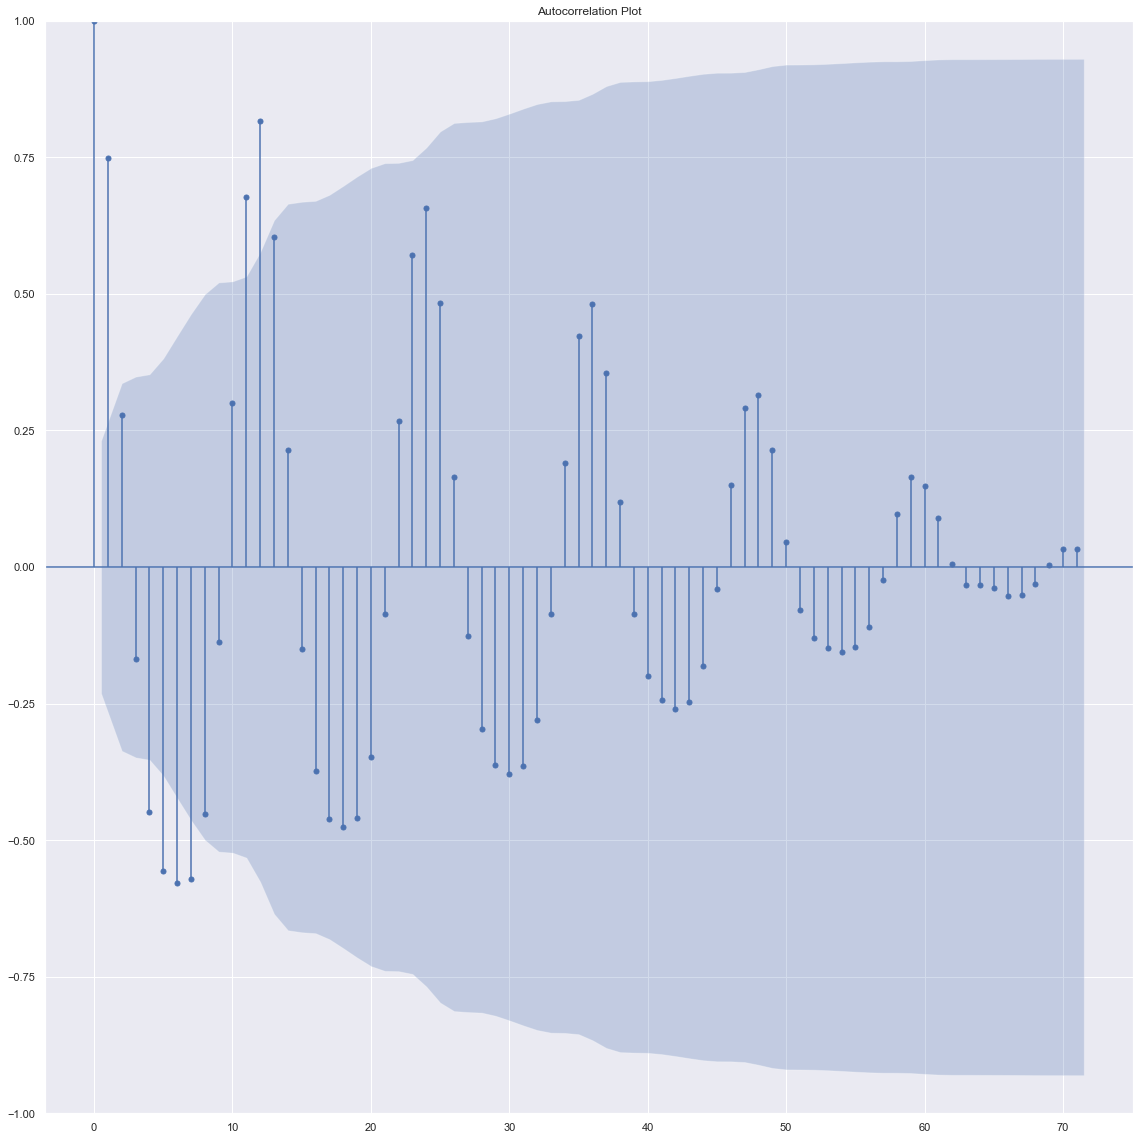

<Figure size 720x432 with 0 Axes>

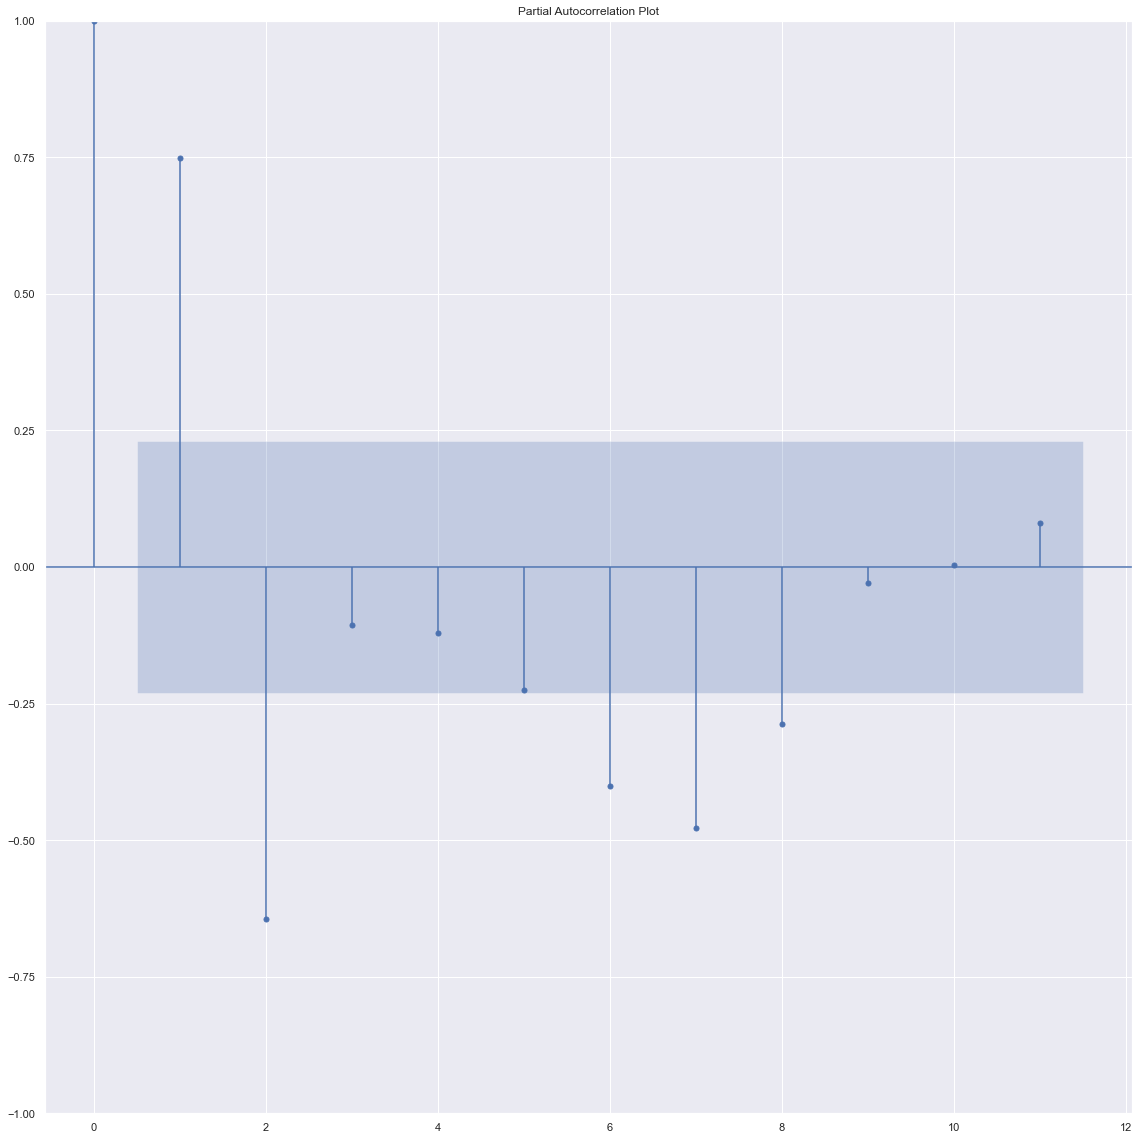

In [41]:
# Calculate the maximum number of lags based on the available data points
max_lags = len(time_series_df) - 1

# Calculate autocorrelation and partial autocorrelation plots
plt.figure(figsize=(10, 6))
plot_acf(time_series_df['Earth Skin Temperature (C)'], lags=max_lags)
plt.title('Autocorrelation Plot')
plt.tight_layout()
plt.show()

# Reduce the number of lags for the partial autocorrelation plot
max_pacf_lags = min(11, len(time_series_df) - 2)  # Maximum lags supported is 11
plt.figure(figsize=(10, 6))
plot_pacf(time_series_df['Earth Skin Temperature (C)'], lags=max_pacf_lags)
plt.title('Partial Autocorrelation Plot')
plt.tight_layout()
plt.show()

In [42]:
print("""
Time Series Analysis Report:

1. Time Series Plot:
   The Time Series Plot shows the variation of Earth Skin Temperature over time. There is a noticeable seasonality pattern.

2. Seasonal Decomposition Plot:
   The Seasonal Decomposition Plot breaks down the time series into its components: trend, seasonality, and residuals. The trend indicates an increasing temperature trend over time, with clear seasonality observed.

3. Autocorrelation Plot:
   The Autocorrelation Plot shows significant autocorrelation at lags corresponding to the seasonality of the data, suggesting the presence of a repeating pattern.

4. Partial Autocorrelation Plot:
   The Partial Autocorrelation Plot suggests an autoregressive order of around 2, as there are significant correlations at lags 1 and 2.

Based on these analyses, it's recommended to consider modeling the data using techniques that account for the observed seasonality and potential autoregressive behavior.

""")


Time Series Analysis Report:

1. Time Series Plot:
   The Time Series Plot shows the variation of Earth Skin Temperature over time. There is a noticeable seasonality pattern.

2. Seasonal Decomposition Plot:
   The Seasonal Decomposition Plot breaks down the time series into its components: trend, seasonality, and residuals. The trend indicates an increasing temperature trend over time, with clear seasonality observed.

3. Autocorrelation Plot:
   The Autocorrelation Plot shows significant autocorrelation at lags corresponding to the seasonality of the data, suggesting the presence of a repeating pattern.

4. Partial Autocorrelation Plot:
   The Partial Autocorrelation Plot suggests an autoregressive order of around 2, as there are significant correlations at lags 1 and 2.

Based on these analyses, it's recommended to consider modeling the data using techniques that account for the observed seasonality and potential autoregressive behavior.




### 5.7. Create Dropdown Widgets to Visualize Data in an Interactive Way.

In [43]:
# Import required libraries
import ipywidgets as widgets
from IPython.display import display, clear_output

In [44]:
# Get unique locations from the DataFrame
all_locations = final_df["Location"].unique()

# Create widgets
plot_type_dropdown = widgets.Dropdown(options=["Line Plot", "Bar Plot", "Heatmap", "Scatter Plot", "Histogram", "Box Plot", "Violin Plot"], description="Plot Type:")
location_dropdown = widgets.Dropdown(options=["All Locations"] + list(all_locations), value="All Locations", description="Location:")
output = widgets.Output()

In [67]:

# Set Seaborn style
sns.set(rc={'figure.figsize':(10, 6)})

# Get unique locations from the DataFrame
all_locations = final_df["Location"].unique()

# Create widgets
plot_type_dropdown = widgets.Dropdown(options=["Line Plot", "Scatter Plot", "Bar Plot", "Histogram", "Box Plot"], description="Plot Type:")
param_dropdown = widgets.Dropdown(options=list(final_df.columns[3:]), description="Parameter:")
location_dropdown = widgets.Dropdown(options=["All Locations"] + list(all_locations), value="All Locations", description="Location:")
output = widgets.Output()

# Plot update function
def update_plot(change):
    with output:
        clear_output(wait=True)
        selected_plot_type = plot_type_dropdown.value
        selected_param = param_dropdown.value
        selected_location = location_dropdown.value
        
        if selected_location == "All Locations":
            selected_data = final_df
        else:
            selected_data = final_df[final_df["Location"] == selected_location]
        
        if selected_plot_type == "Line Plot":
            plt.figure(figsize=(10, 6))
            for location in selected_data["Location"].unique():
                location_data = selected_data[selected_data["Location"] == location]
                sns.lineplot(x="Date", y=selected_param, data=location_data, marker='o', markersize=6, label=location)
            x_ticks = final_df[final_df["Location"] == "Dhaka"]["Date"].iloc[::30]  
            plt.xticks(x_ticks, rotation=45, ha="right")  
            plt.title(f"{selected_param} Trend", fontsize=16)
            plt.xlabel("Date", fontsize=14)
            plt.ylabel(selected_param, fontsize=14)
            plt.xticks(rotation=45)
            plt.legend()
            plt.tight_layout()
            plt.show()

        elif selected_plot_type == "Scatter Plot":
            plt.figure(figsize=(10, 6))
            for location in selected_data["Location"].unique():
                location_data = selected_data[selected_data["Location"] == location]
                sns.scatterplot(x="Date", y="Temperature at 2 Meters (C)", data=location_data, label=location)
            plt.xticks(final_df['Date'][::150], rotation=45, ha="right")
            plt.title(f"{selected_param} vs Temperature", fontsize=16)
            plt.xlabel(selected_param, fontsize=14)
            plt.ylabel("Temperature (°C)", fontsize=14)
            plt.legend()
            plt.tight_layout()
            plt.show()

        elif selected_plot_type == "Bar Plot":
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x="Location", y=selected_param, data=selected_data)
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

            plt.title(f"Average {selected_param} by Location", fontsize=16)
            plt.xlabel("Location", fontsize=14)
            plt.ylabel(f"Average {selected_param}", fontsize=14)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


        elif selected_plot_type == "Histogram":
            plt.figure(figsize=(10, 6))
            sns.histplot(selected_data[selected_param], bins=20, kde=True, color='purple')
            # Calculate mode and median
            mode = final_df[selected_param].mode()[0]
            median = final_df[selected_param].median()

            # Add vertical lines for mode and median
            plt.axvline(x=mode, color='r', linestyle='--', label=f'Mode: {mode:.2f}')
            plt.axvline(x=median, color='g', linestyle='--', label=f'Median: {median:.2f}')

            # Annotate mode and median values
            plt.text(mode + 0.2, plt.ylim()[1]*0.9, f'Mode: {mode:.2f}', color='r')
            plt.text(median + 0.2, plt.ylim()[1]*0.85, f'Median: {median:.2f}', color='g')

            plt.title(f"{selected_param} Distribution", fontsize=16)
            plt.xlabel(selected_param, fontsize=14)
            plt.ylabel("Frequency", fontsize=14)
            plt.tight_layout()
            plt.show()

        elif selected_plot_type == "Box Plot":
            plt.figure(figsize=(10, 6))
            sns.boxplot(x="Location", y=selected_param, data=selected_data)
            plt.title(f"{selected_param} Distribution by Location", fontsize=16)
            plt.xlabel("Location", fontsize=14)
            plt.ylabel(selected_param, fontsize=14)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Attach the update_plot function to widget events
plot_type_dropdown.observe(update_plot, names="value")
param_dropdown.observe(update_plot, names="value")
location_dropdown.observe(update_plot, names="value")

# Display widgets and initial plot
display(plot_type_dropdown, param_dropdown, location_dropdown, output)

Dropdown(description='Plot Type:', options=('Line Plot', 'Scatter Plot', 'Bar Plot', 'Histogram', 'Box Plot'),…

Dropdown(description='Parameter:', options=('Earth Skin Temperature (C)', 'Relative Humidity at 2 Meters (%)',…

Dropdown(description='Location:', options=('All Locations', 'Barisal', 'Khulna', 'Rajshahi', 'Dhaka', 'Chittag…

Output()

In [41]:
final_df.head(10)

,Date,Coordinates,Location,Earth Skin Temperature (C),Relative Humidity at 2 Meters (%),Specific Humidity at 2 Meters (g/kg),Temperature at 2 Meters (C)
0,2020-01-01,"(88.1462, 22.6939)",Barisal,15.25,76.50,8.36,16.01
1,2020-01-01,"(88.6178, 24.9036)",Khulna,17.30,83.31,10.38,17.83
2,2020-01-01,"(89.3554, 24.3636)",Rajshahi,17.69,78.88,10.50,18.91
3,2020-01-01,"(90.415, 23.716)",Dhaka,18.70,71.25,10.31,20.40
4,2020-01-01,"(91.8367, 22.336)",Chittagong,21.28,74.25,11.72,21.71
5,2020-01-01,"(92.2905, 24.3745)",Sylhet,18.11,78.56,10.74,19.15
6,2020-01-02,"(88.1462, 22.6939)",Barisal,16.69,82.38,10.01,17.38
7,2020-01-02,"(88.6178, 24.9036)",Khulna,18.08,84.31,10.80,18.28
8,2020-01-02,"(89.3554, 24.3636)",Rajshahi,18.89,83.50,11.29,19.26
9,2020-01-02,"(90.415, 23.716)",Dhaka,18.83,78.19,11.29,20.23


## 6. Machine Learning to Predict and Forecast Data

### 6.1 Prediction and Forecasting Using Prophet Algorithm

In [71]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


In [46]:
# Import required libraries
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np


#### 6.1.1 Predicting and Forecasting Earth Skin Temperature (C) for Dhaka

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Mean Squared Error for Predicted Values: 2.392431937854587


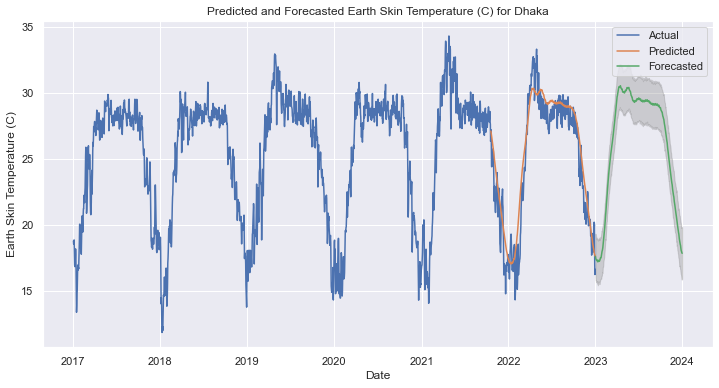

In [79]:
final_df["Date"] = pd.to_datetime(final_df["Date"])

# Filter data for Dhaka
dhaka_df = final_df[final_df["Location"] == "Dhaka"]

# Split the data into train (80%) and test (20%) sets
train_size = int(0.8 * len(dhaka_df))
train_df = dhaka_df[:train_size]
test_df = dhaka_df[train_size:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_df[["Date", "Earth Skin Temperature (C)"]].rename(columns={"Date": "ds", "Earth Skin Temperature (C)": "y"}))

# Make predictions on the test set
forecast = model.predict(test_df[["Date"]].rename(columns={"Date": "ds"}))

# Calculate Mean Squared Error for predicted values
mse_predicted = mean_squared_error(test_df["Earth Skin Temperature (C)"], forecast["yhat"])
print("Mean Squared Error for Predicted Values:", mse_predicted)

# Create a DataFrame with future dates for 2022
future_dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
future = pd.DataFrame({"ds": future_dates})

# Forecast for 2023
forecast_2023 = model.predict(future)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(dhaka_df["Date"], dhaka_df["Earth Skin Temperature (C)"], label="Actual")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted")
plt.plot(forecast_2023["ds"], forecast_2023["yhat"], label="Forecasted")
plt.fill_between(forecast_2023["ds"], forecast_2023["yhat_lower"], forecast_2023["yhat_upper"], color="gray", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Earth Skin Temperature (C)")
plt.title("Predicted and Forecasted Earth Skin Temperature (C) for Dhaka")
plt.legend()
plt.show()

#### 6.1.2 Fine Tuning the Model to Minimize the Mean Squared Error

C:\Users\RATUL\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Mean Squared Error for Predicted Values: 2.293136913549979


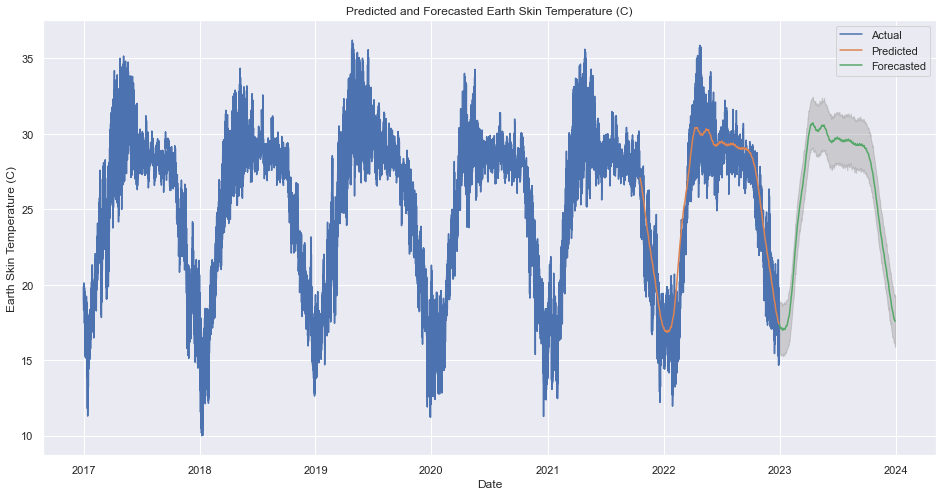

In [80]:
final_df["Date"] = pd.to_datetime(final_df["Date"])

# Filter data for Dhaka
dhaka_df = final_df[final_df["Location"] == "Dhaka"]

# Split the data into train (80%) and test (20%) sets
train_size = int(0.8 * len(dhaka_df))
train_df = dhaka_df[:train_size]
test_df = dhaka_df[train_size:]


# Create a Prophet model with additional seasonality and holidays
model = Prophet(
    seasonality_mode="multiplicative",  # You can also try "additive"
    changepoint_prior_scale=0.00095,        # Adjust this parameter
    holidays_prior_scale= 5           # Adjust this parameter
)

# Add weekly and yearly seasonality
model.add_seasonality(name="weekly", period=7, fourier_order=5)
model.add_seasonality(name="yearly", period=365.25, fourier_order=10)

# Fit the model on the training data
train_df.rename(columns={"Date": "ds", "Earth Skin Temperature (C)": "y"}, inplace=True)
model.fit(train_df)

# Make predictions on the test set
forecast = model.predict(test_df.rename(columns={"Date": "ds"}))

# Calculate Mean Squared Error for predicted values
mse_predicted = mean_squared_error(test_df["Earth Skin Temperature (C)"], forecast["yhat"])
print("Mean Squared Error for Predicted Values:", mse_predicted)

# Create a DataFrame with future dates for 2023
future_dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
future = pd.DataFrame({"ds": future_dates})

# Forecast for 2023
forecast_2023 = model.predict(future)

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(final_df["Date"], final_df["Earth Skin Temperature (C)"], label="Actual")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted")
plt.plot(forecast_2023["ds"], forecast_2023["yhat"], label="Forecasted")
plt.fill_between(forecast_2023["ds"], forecast_2023["yhat_lower"], forecast_2023["yhat_upper"], color="gray", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Earth Skin Temperature (C)")
plt.title("Predicted and Forecasted Earth Skin Temperature (C)")
plt.legend()
plt.show()

In [81]:
# Save the forecasted values for 2022 as a CSV file
forecast_2023.to_csv("forecasted_values_2023_prophet.csv", index=False)

In [82]:
# Read the forecasted values from the CSV file
forecasted_values_prophet = pd.read_csv("forecasted_values_2023_prophet.csv")
forecasted_values_prophet.rename(columns={"ds": "Date", "yhat":"Earth Skin Temperature (C)"},inplace=True)
Forecast_prophet = forecasted_values_prophet[["Date","Earth Skin Temperature (C)"]]
Forecast_prophet

,Date,Earth Skin Temperature (C)
0,2023-01-01,17.360474
1,2023-01-02,17.232908
2,2023-01-03,17.173503
3,2023-01-04,17.114116
4,2023-01-05,17.122597
...,...,...
360,2023-12-27,17.761094
361,2023-12-28,17.718254
362,2023-12-29,17.645667
363,2023-12-30,17.594284


In [83]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

Mean Squared Error for Predicted Values: 2.163695817304747


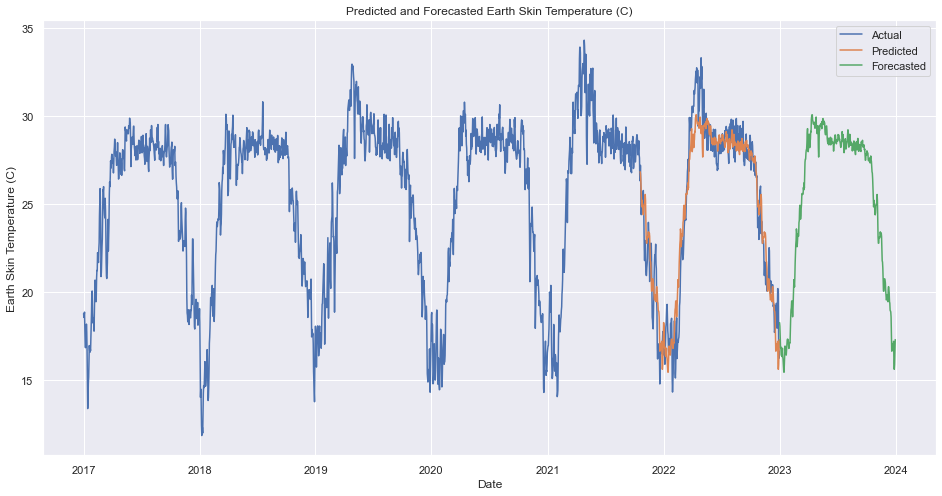

In [85]:
final_df["Date"] = pd.to_datetime(final_df["Date"])

# Filter data for Dhaka
dhaka_df = final_df[final_df["Location"] == "Dhaka"]

# Split the data into train (80%) and test (20%) sets
train_size = int(0.8 * len(dhaka_df))
train_df = dhaka_df[:train_size]
test_df = dhaka_df[train_size:]

# Define features and target variable
X_train = train_df["Date"].dt.dayofyear.values.reshape(-1, 1)  # Using day of the year as a feature
y_train = train_df["Earth Skin Temperature (C)"].values
X_test = test_df["Date"].dt.dayofyear.values.reshape(-1, 1)
y_test = test_df["Earth Skin Temperature (C)"].values

# Initialize and fit XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for predicted values
mse_predicted = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Predicted Values:", mse_predicted)

# Create a DataFrame with future dates for 2023
future_dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
future = pd.DataFrame({"Date": future_dates})

# Prepare future features
future["DayOfYear"] = future["Date"].dt.dayofyear.values

# Forecast for 2023
forecast_2023_untuned = model.predict(future["DayOfYear"].values.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(dhaka_df["Date"], dhaka_df["Earth Skin Temperature (C)"], label="Actual")
plt.plot(test_df["Date"], y_pred, label="Predicted")
plt.plot(future["Date"], forecast_2023_untuned, label="Forecasted")
plt.xlabel("Date")
plt.ylabel("Earth Skin Temperature (C)")
plt.title("Predicted and Forecasted Earth Skin Temperature (C)")
plt.legend()
plt.show()

In [87]:
forecast_2023_untuned

array([18.25489 , 18.057795, 17.328032, 16.828068, 16.868338, 16.408941,
       16.390944, 16.32975 , 16.499735, 16.79888 , 16.33193 , 16.153738,
       15.821999, 15.504757, 15.433555, 15.881493, 16.498924, 16.923819,
       16.844099, 16.728443, 16.476007, 16.409416, 16.66655 , 16.937862,
       17.269875, 17.318453, 17.291353, 17.291353, 17.051348, 16.788427,
       16.809797, 17.117596, 17.080847, 17.156199, 17.876472, 18.577261,
       18.982403, 19.096342, 19.479753, 19.48938 , 18.93904 , 18.585722,
       18.903801, 19.520714, 20.231678, 20.69472 , 20.469604, 20.281357,
       20.808968, 21.629526, 22.132648, 22.69408 , 22.928389, 23.578491,
       23.402578, 22.565653, 22.752829, 23.108433, 23.290325, 23.175774,
       23.175774, 23.928942, 24.058016, 24.732647, 24.925   , 24.735935,
       24.133156, 24.342337, 24.749998, 24.960825, 25.474123, 25.592167,
       25.534258, 25.562061, 25.562061, 25.93177 , 25.789583, 26.195293,
       25.904753, 26.542543, 27.373596, 27.536121, 

In [88]:
from sklearn.model_selection import GridSearchCV

Mean Squared Error for Predicted Values: 2.099826507516016


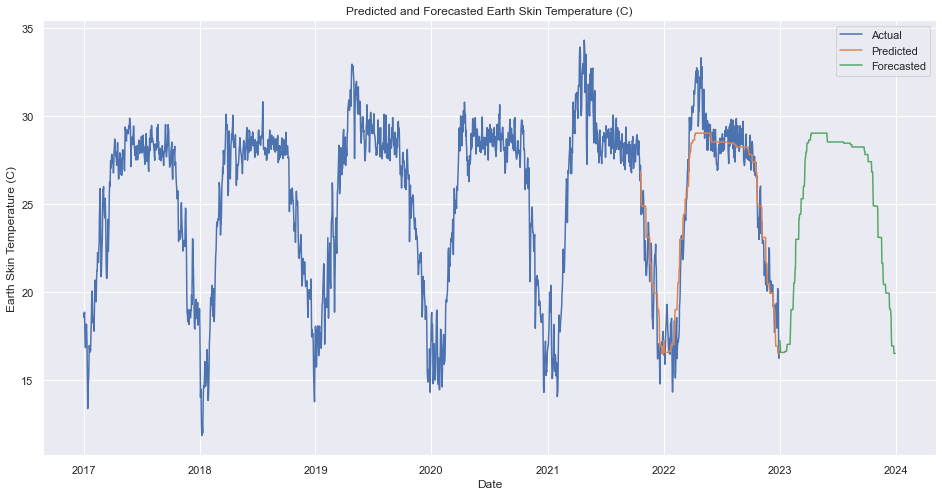

In [98]:
# Define features and target variable
X_train = train_df["Date"].dt.dayofyear.values.reshape(-1, 1)
y_train = train_df["Earth Skin Temperature (C)"].values
X_test = test_df["Date"].dt.dayofyear.values.reshape(-1, 1)
y_test = test_df["Earth Skin Temperature (C)"].values

# Initialize XGBoost model
model = XGBRegressor(objective="reg:squarederror")

# Define hyperparameters to tune
param_grid = {
    "n_estimators": [20,25,30],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [1, 2, 3],
    "subsample": [0.5, 0.75, 1.0],
    "colsample_bytree": [0.1, 0.2, .3]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", cv=3)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error for predicted values
mse_predicted = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Predicted Values:", mse_predicted)

# Create a DataFrame with future dates for 2022
future_dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
future = pd.DataFrame({"Date": future_dates})

# Prepare future features
future["DayOfYear"] = future["Date"].dt.dayofyear.values

# Forecast for 2022 using the best model
forecast_2023_tuned = best_model.predict(future["DayOfYear"].values.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(dhaka_df["Date"], dhaka_df["Earth Skin Temperature (C)"], label="Actual")
plt.plot(test_df["Date"], y_pred, label="Predicted")
plt.plot(future["Date"], forecast_2023_tuned, label="Forecasted")
plt.xlabel("Date")
plt.ylabel("Earth Skin Temperature (C)")
plt.title("Predicted and Forecasted Earth Skin Temperature (C)")
plt.legend()
plt.show()

In [93]:
forecast_2023_tuned

array([17.231937, 17.231937, 17.038334, 16.563572, 16.563572, 16.563572,
       16.563572, 16.563572, 16.563572, 16.563572, 16.563572, 16.563572,
       16.563572, 16.563572, 16.563572, 16.563572, 16.563572, 16.62372 ,
       16.62372 , 16.62372 , 16.62372 , 16.62372 , 16.62372 , 16.870346,
       17.021086, 17.021086, 17.021086, 17.021086, 17.021086, 17.021086,
       17.021086, 17.021086, 17.021086, 17.021086, 17.786137, 18.372763,
       18.98758 , 18.98758 , 18.98758 , 18.98758 , 18.98758 , 18.98758 ,
       18.98758 , 19.491016, 20.095257, 20.510523, 20.510523, 20.510523,
       20.711493, 21.33225 , 21.33225 , 22.988266, 22.988266, 22.988266,
       22.988266, 22.988266, 22.988266, 22.988266, 22.988266, 22.988266,
       22.988266, 24.171753, 24.171753, 24.416222, 24.416222, 24.416222,
       24.416222, 24.416222, 25.288658, 25.288658, 25.288658, 25.288658,
       25.288658, 25.288658, 25.288658, 25.99271 , 25.99271 , 25.99271 ,
       25.99271 , 26.505371, 27.369568, 27.63643 , 

In [67]:
from sklearn.ensemble import RandomForestRegressor

Mean Squared Error for Predicted Values: 35.234915381768296


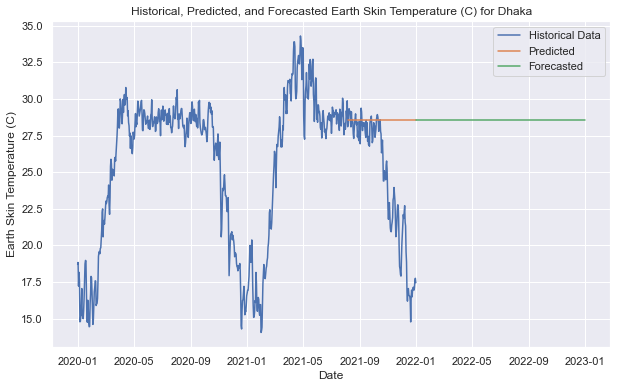

In [69]:

final_df["Date"] = pd.to_datetime(final_df["Date"])

# Filter data for Dhaka
dhaka_df = final_df[final_df["Location"] == "Dhaka"]

# Split the data into train (80%) and test (20%) sets
train_size = int(0.8 * len(dhaka_df))
train_df = dhaka_df[:train_size]
test_df = dhaka_df[train_size:]

# Model initialization and fitting
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_df[["Date"]], train_df["Earth Skin Temperature (C)"])

# Make predictions on the test set
predictions = model.predict(test_df[["Date"]])

# Calculate Mean Squared Error for predicted values
mse_predicted = mean_squared_error(test_df["Earth Skin Temperature (C)"], predictions)
print("Mean Squared Error for Predicted Values:", mse_predicted)

# Create a DataFrame with future dates for 2022
future_dates = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
future_df = pd.DataFrame({"Date": future_dates})

# Forecast for 2022
forecast_2022 = model.predict(future_df[["Date"]])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(dhaka_df["Date"], dhaka_df["Earth Skin Temperature (C)"], label="Historical Data")
plt.plot(test_df["Date"], predictions, label="Predicted")
plt.plot(future_df["Date"], forecast_2022, label="Forecasted")
plt.xlabel("Date")
plt.ylabel("Earth Skin Temperature (C)")
plt.title("Historical, Predicted, and Forecasted Earth Skin Temperature (C) for Dhaka")
plt.legend()
plt.show()


In [70]:
from sklearn.model_selection import GridSearchCV

Mean Squared Error for Predicted Values: 19.56538265236509


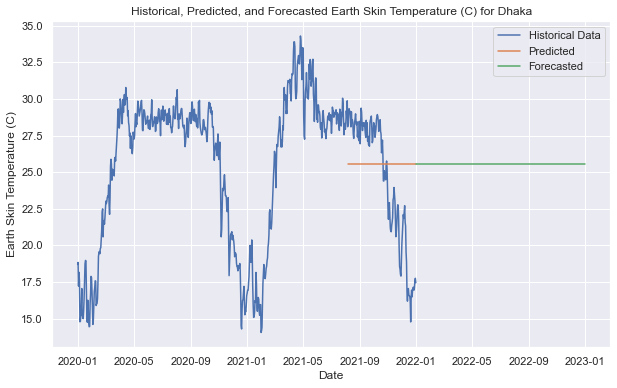

In [81]:
final_df["Date"] = pd.to_datetime(final_df["Date"])

# Filter data for Dhaka
dhaka_df = final_df[final_df["Location"] == "Dhaka"]

# Split the data into train (80%) and test (20%) sets
train_size = int(0.8 * len(dhaka_df))
train_df = dhaka_df[:train_size]
test_df = dhaka_df[train_size:]

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [1, 2, 3],
    'max_depth': [0.1, 0.2, 0.3],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(train_df[["Date"]], train_df["Earth Skin Temperature (C)"])

# Best parameters from grid search
best_params = grid_search.best_params_

# Model with best parameters
best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(train_df[["Date"]], train_df["Earth Skin Temperature (C)"])

# Make predictions on the test set
predictions = best_model.predict(test_df[["Date"]])

# Calculate Mean Squared Error for predicted values
mse_predicted = mean_squared_error(test_df["Earth Skin Temperature (C)"], predictions)
print("Mean Squared Error for Predicted Values:", mse_predicted)

# Create a DataFrame with future dates for 2022
future_dates = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
future_df = pd.DataFrame({"Date": future_dates})

# Forecast for 2022
forecast_2022 = best_model.predict(future_df[["Date"]])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(dhaka_df["Date"], dhaka_df["Earth Skin Temperature (C)"], label="Historical Data")
plt.plot(test_df["Date"], predictions, label="Predicted")
plt.plot(future_df["Date"], forecast_2022, label="Forecasted")
plt.xlabel("Date")
plt.ylabel("Earth Skin Temperature (C)")
plt.title("Historical, Predicted, and Forecasted Earth Skin Temperature (C) for Dhaka")
plt.legend()
plt.show()

C:\Users\RATUL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\RATUL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Mean Squared Error for Predicted Values: 39.213482346201246


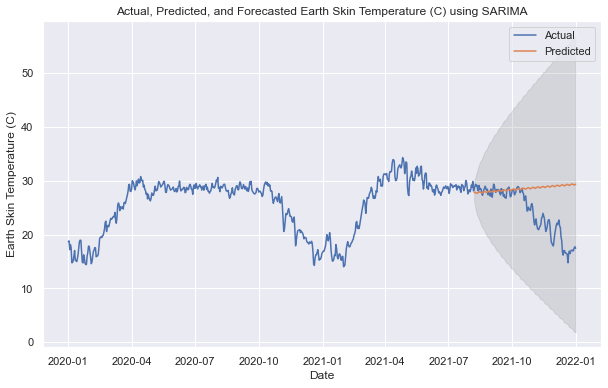

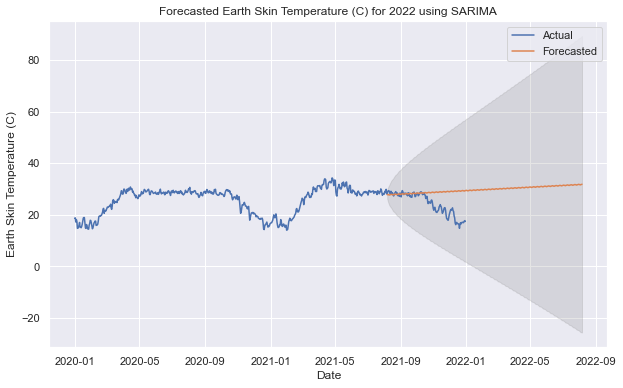

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load and preprocess the data
# Assuming 'final_df' is loaded and preprocessed
final_df["Date"] = pd.to_datetime(final_df["Date"])
dhaka_df = final_df[final_df["Location"] == "Dhaka"]
dhaka_df = dhaka_df.set_index("Date")

# Split the data into train and test sets
train_size = int(0.8 * len(dhaka_df))
train_data = dhaka_df[:train_size]
test_data = dhaka_df[train_size:]

# SARIMA model parameters
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, S)
model = SARIMAX(train_data["Earth Skin Temperature (C)"],
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Make predictions on the test set
forecast = model_fit.get_forecast(steps=len(test_data))
forecasted_values = forecast.predicted_mean

# Calculate Mean Squared Error for predicted values
mse_predicted = mean_squared_error(test_data["Earth Skin Temperature (C)"], forecasted_values)
print("Mean Squared Error for Predicted Values:", mse_predicted)

# Plot the actual, predicted, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(dhaka_df.index, dhaka_df["Earth Skin Temperature (C)"], label="Actual")
plt.plot(test_data.index, forecasted_values, label="Predicted")
forecast_ci = forecast.conf_int()
plt.fill_between(test_data.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.xlabel("Date")
plt.ylabel("Earth Skin Temperature (C)")
plt.title("Actual, Predicted, and Forecasted Earth Skin Temperature (C) using SARIMA")
plt.legend()
plt.show()

# Forecast for 2022
forecast_future = model_fit.get_forecast(steps=365)
forecasted_values_future = forecast_future.predicted_mean

# Plot the forecasted values for 2022
plt.figure(figsize=(10, 6))
plt.plot(dhaka_df.index, dhaka_df["Earth Skin Temperature (C)"], label="Actual")
plt.plot(forecasted_values_future.index, forecasted_values_future, label="Forecasted")
forecast_future_ci = forecast_future.conf_int()
plt.fill_between(forecasted_values_future.index, forecast_future_ci.iloc[:, 0], forecast_future_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.xlabel("Date")
plt.ylabel("Earth Skin Temperature (C)")
plt.title("Forecasted Earth Skin Temperature (C) for 2022 using SARIMA")
plt.legend()
plt.show()

In [85]:
pip install pmdarima


  Using cached pmdarima-2.0.3-cp38-cp38-win_amd64.whl (572 kB)
Note: you may need to restart the kernel to use updated packages.


C:\Users\RATUL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\RATUL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error for Predicted Values: 32.61840298358946


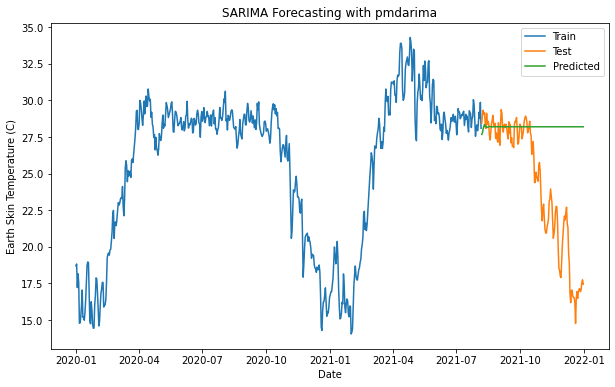

C:\Users\RATUL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\RATUL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


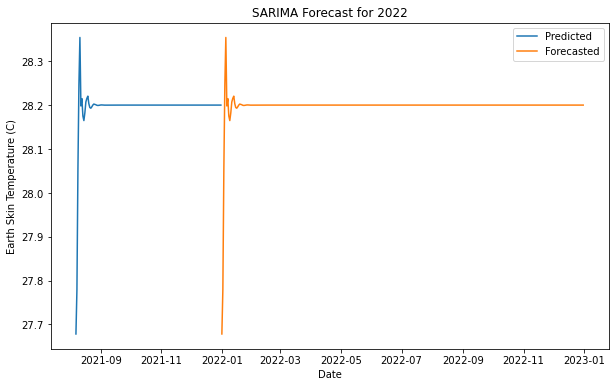

In [10]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess your DataFrame 'final_df'
# Assuming 'final_df' is already loaded and preprocessed
final_df["Date"] = pd.to_datetime(final_df["Date"])

# Filter data for Dhaka
dhaka_df = final_df[final_df["Location"] == "Dhaka"]

# Split the data into train (80%) and test (20%) sets
train_size = int(0.8 * len(dhaka_df))
train_df = dhaka_df[:train_size]
test_df = dhaka_df[train_size:]

# Find the best SARIMA parameters using auto_arima
model = auto_arima(train_df["Earth Skin Temperature (C)"], seasonal=True, m=7, stepwise=True)
model.fit(train_df["Earth Skin Temperature (C)"])

# Get predictions
forecast, conf_int = model.predict(n_periods=len(test_df), return_conf_int=True)

# Calculate Mean Squared Error for predicted values
mse_predicted = mean_squared_error(test_df["Earth Skin Temperature (C)"], forecast)
print("Mean Squared Error for Predicted Values:", mse_predicted)

# Visualize the actual, predicted, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train_df["Date"], train_df["Earth Skin Temperature (C)"], label="Train")
plt.plot(test_df["Date"], test_df["Earth Skin Temperature (C)"], label="Test")
plt.plot(test_df["Date"], forecast, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Earth Skin Temperature (C)")
plt.title("SARIMA Forecasting with pmdarima")
plt.legend()
plt.show()

# Create a DataFrame with future dates for 2022
future_dates = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
future_df = pd.DataFrame({"Date": future_dates})

# Forecast for 2022 using the trained model
forecast_2022, conf_int_2022 = model.predict(n_periods=len(future_df), return_conf_int=True)

# Visualize the forecast for 2022
plt.figure(figsize=(10, 6))
plt.plot(test_df["Date"], forecast, label="Predicted")
plt.plot(future_df["Date"], forecast_2022, label="Forecasted")
plt.xlabel("Date")
plt.ylabel("Earth Skin Temperature (C)")
plt.title("SARIMA Forecast for 2022")
plt.legend()
plt.show()

In [64]:
train_df.head()

,Date,Coordinates,Location,Earth Skin Temperature (C),Relative Humidity at 2 Meters (%),Specific Humidity at 2 Meters (g/kg),Temperature at 2 Meters (C),lag_1
9,2020-01-02,"(90.415, 23.716)",Dhaka,18.83,78.19,11.29,20.23,18.70
15,2020-01-03,"(90.415, 23.716)",Dhaka,17.22,92.19,11.60,17.83,18.83
21,2020-01-04,"(90.415, 23.716)",Dhaka,18.16,85.56,10.99,18.26,17.22
27,2020-01-05,"(90.415, 23.716)",Dhaka,17.54,87.00,10.80,17.68,18.16
33,2020-01-06,"(90.415, 23.716)",Dhaka,14.78,83.81,8.67,14.98,17.54


In [66]:
final_df.head(15)

,Date,Coordinates,Location,Earth Skin Temperature (C),Relative Humidity at 2 Meters (%),Specific Humidity at 2 Meters (g/kg),Temperature at 2 Meters (C)
0,2020-01-01,"(88.1462, 22.6939)",Barisal,15.25,76.50,8.36,16.01
1,2020-01-01,"(88.6178, 24.9036)",Khulna,17.30,83.31,10.38,17.83
2,2020-01-01,"(89.3554, 24.3636)",Rajshahi,17.69,78.88,10.50,18.91
3,2020-01-01,"(90.415, 23.716)",Dhaka,18.70,71.25,10.31,20.40
4,2020-01-01,"(91.8367, 22.336)",Chittagong,21.28,74.25,11.72,21.71
5,2020-01-01,"(92.2905, 24.3745)",Sylhet,18.11,78.56,10.74,19.15
6,2020-01-02,"(88.1462, 22.6939)",Barisal,16.69,82.38,10.01,17.38
7,2020-01-02,"(88.6178, 24.9036)",Khulna,18.08,84.31,10.80,18.28
8,2020-01-02,"(89.3554, 24.3636)",Rajshahi,18.89,83.50,11.29,19.26
9,2020-01-02,"(90.415, 23.716)",Dhaka,18.83,78.19,11.29,20.23
